In [7]:
import numpy as np
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
y = np.random.randint(0,2,50)

In [15]:
score = np.random.random(50)

In [31]:
fpr, tpr, thresholds = roc_curve(y, score, pos_label=1)

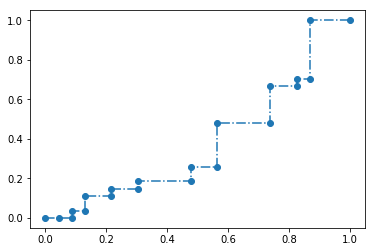

In [32]:
plt.plot(fpr,tpr,'-.',marker='o')

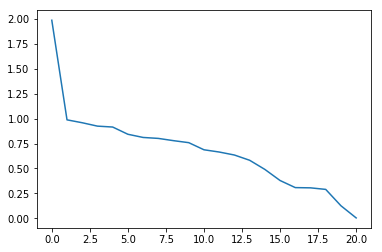

In [33]:
plt.plot(thresholds)

In [34]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier, GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

In [35]:
X, y = make_classification(n_samples=8000)

In [36]:
X.shape

(8000, 20)

In [37]:
y.shape

(8000,)

(array([   1.,    1.,    0.,    0.,    0.,    2.,    1.,    1.,    2.,
           3.,    2.,    3.,   12.,    6.,   14.,   10.,   19.,   17.,
          20.,   24.,   18.,   32.,   41.,   35.,   48.,   54.,   55.,
          63.,   78.,   79.,   88.,   96.,  111.,  124.,  126.,  134.,
         136.,  141.,  163.,  162.,  190.,  208.,  223.,  204.,  221.,
         250.,  221.,  238.,  240.,  253.,  234.,  226.,  257.,  228.,
         208.,  200.,  174.,  225.,  204.,  183.,  142.,  155.,  135.,
         135.,  133.,  109.,   86.,  104.,   85.,   78.,   77.,   55.,
          63.,   55.,   34.,   50.,   36.,   27.,   27.,   19.,   13.,
          12.,   14.,    9.,   13.,    5.,    5.,    5.,    5.,    0.,
           1.,    0.,    0.,    1.,    0.,    1.,    0.,    0.,    1.,    1.]),
 array([-3.58937546, -3.51672474, -3.44407401, -3.37142329, -3.29877256,
        -3.22612184, -3.15347111, -3.08082039, -3.00816967, -2.93551894,
        -2.86286822, -2.79021749, -2.71756677, -2.64491604, -2.5

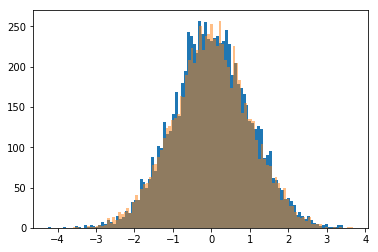

In [43]:
plt.hist(X[:,0],bins = 100)
plt.hist(X[:,10],bins = 100, alpha = 0.5)

In [44]:
y[:10]

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 0])

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [46]:
X_train, X_train_lr, y_train, y_train_lr = train_test_split(X_train, y_train, test_size=0.5)

In [47]:
rt = RandomTreesEmbedding()

In [48]:
rt_lm = LogisticRegression()

In [49]:
pipeline = make_pipeline(rt, rt_lm)

In [50]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('randomtreesembedding', RandomTreesEmbedding(max_depth=5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           random_state=None, ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [57]:
y_pred_rt = pipeline.predict_proba(X_test)[:,1]

In [59]:
fpr_rt_lm, tpr_rt_lm, thr_rt_lm = roc_curve(y_test, y_pred_rt)

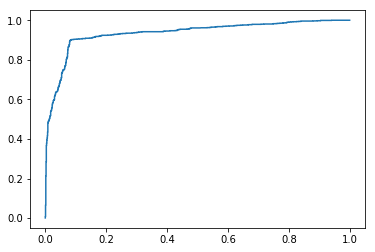

In [60]:
plt.plot(fpr_rt_lm, tpr_rt_lm)

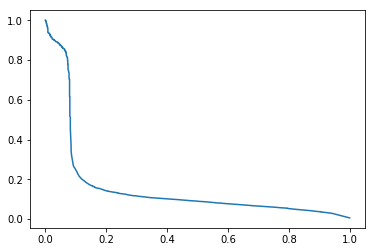

In [62]:
plt.plot(fpr_rt_lm,thr_rt_lm)

# Random Forest

In [63]:
rf = RandomForestClassifier(max_depth=5)
rf_enc = OneHotEncoder()
rf_lm = LogisticRegression()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [68]:
rf_enc.fit(rf.apply(X_train))

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [69]:
rf_enc.fit_transform(rf.apply(X_train_lr),y_train_lr)

<2800x216 sparse matrix of type '<class 'numpy.float64'>'
	with 28000 stored elements in Compressed Sparse Row format>

In [71]:
rf_lm.fit(rf_enc.transform(rf.apply(X_train_lr)), y_train_lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [72]:
y_pred_rf_lm = rf_lm.predict_proba(rf_enc.transform(rf.apply(X_test)))[:, 1]
fpr_rf_lm, tpr_rf_lm, thr_rf_lm = roc_curve(y_test, y_pred_rf_lm)

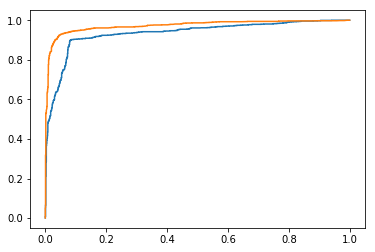

In [73]:
plt.plot(fpr_rt_lm, tpr_rt_lm, fpr_rf_lm, tpr_rf_lm)

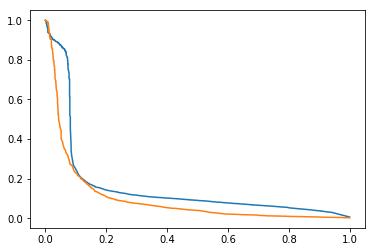

In [74]:
plt.plot(fpr_rt_lm,thr_rt_lm, fpr_rf_lm,thr_rf_lm)

# Gradient Boosting

In [76]:
grd = GradientBoostingClassifier(n_estimators = 10)
grd_enc = OneHotEncoder()
grd_lm = LogisticRegression()

In [77]:
grd.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [81]:
grd_enc.fit(grd.apply(X_train)[:,:,0])

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [83]:
grd_lm.fit(grd_enc.transform(grd.apply(X_train_lr)[:,:,0]), y_train_lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [86]:
y_pred_grd_lm = grd_lm.predict_proba(grd_enc.transform(grd.apply(X_test)[:,:,0]))[:,1]

In [87]:
fpr_grd_lm, tpr_grd_lm, thr_grd_lm = roc_curve(y_test, y_pred_grd_lm)

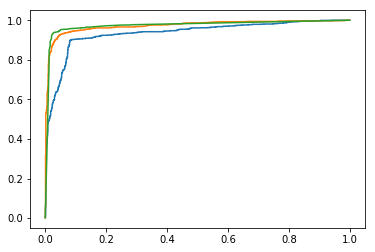

In [88]:
plt.plot(fpr_rt_lm, tpr_rt_lm, fpr_rf_lm, tpr_rf_lm, fpr_grd_lm, tpr_grd_lm)

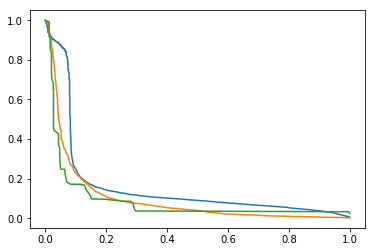

In [89]:
plt.plot(fpr_rt_lm,thr_rt_lm, fpr_rf_lm,thr_rf_lm, fpr_grd_lm, thr_grd_lm)